In [30]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import yfinance as yf # data source (yahoo finance)

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [31]:
# get the stock quote 
df = yf.download('NVDA', start='2020-01-01', end='2024-11-13')

# multi index to one index (ptoblem yfinance.download)
df.columns = df.columns.get_level_values(0)

# show the data 
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000
2020-01-03,5.877112,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973209,6.019017,5.885079,5.930140,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-11-06,145.599960,146.479905,141.950218,142.950149,242043900
2024-11-07,148.869751,148.919735,146.159931,146.379917,207323300
2024-11-08,147.619827,149.759679,146.249911,148.759748,175665800


In [32]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

Price,Open-Close,High-Low
Date,,
2020-01-02,-0.028879,0.079417
2020-01-03,-0.024149,0.092861
2020-01-06,-0.118005,0.149373
2020-01-07,-0.043070,0.133939
2020-01-08,-0.015435,0.096844


In [33]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y


array([0, 1, 1, ..., 0, 1, 0])

In [34]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]


In [35]:
import pickle 

# Support vector classifier
cls = SVC().fit(X_train, y_train)

with open("../model/svm.pkl", 'wb') as file:
    pickle.dump(cls, file)



In [36]:
df['Predicted_Signal'] = cls.predict(X)
# Calculate daily returns
df['Return'] = df.Close.pct_change()
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df


Price,Close,High,Low,Open,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,
2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000,-0.028879,0.079417,1,NaN,NaN,NaN
2020-01-03,5.877112,5.920928,5.828067,5.852963,205384000,-0.024149,0.092861,1,-0.016006,-0.016006,-0.016006
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000,-0.118005,0.149373,1,0.004194,0.004194,-0.011812
2020-01-07,5.973209,6.019017,5.885079,5.930140,314856000,-0.043070,0.133939,1,0.012107,0.012107,0.000295
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000,-0.015435,0.096844,1,0.001875,0.001875,0.002170
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06,145.599960,146.479905,141.950218,142.950149,242043900,-2.649811,4.529686,0,0.040740,0.000000,3.905858
2024-11-07,148.869751,148.919735,146.159931,146.379917,207323300,-2.489834,2.759804,0,0.022457,0.000000,3.928316
2024-11-08,147.619827,149.759679,146.249911,148.759748,175665800,1.139921,3.509768,1,-0.008396,-0.000000,3.919920


In [28]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df


Price,Close,High,Low,Open,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,
2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000,-0.028879,0.079417,1,NaN,NaN,NaN,NaN
2020-01-03,5.877112,5.920928,5.828067,5.852963,205384000,-0.024149,0.092861,1,-0.016006,-0.016006,-0.016006,-0.016006
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000,-0.118005,0.149373,1,0.004194,0.004194,-0.011812,-0.011812
2020-01-07,5.973209,6.019017,5.885079,5.930140,314856000,-0.043070,0.133939,1,0.012107,0.012107,0.000295,0.000295
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000,-0.015435,0.096844,1,0.001875,0.001875,0.002170,0.002170
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06,145.599960,146.479905,141.950218,142.950149,242043900,-2.649811,4.529686,0,0.040740,0.000000,3.905858,3.759028
2024-11-07,148.869751,148.919735,146.159931,146.379917,207323300,-2.489834,2.759804,0,0.022457,0.000000,3.928316,3.759028
2024-11-08,147.619827,149.759679,146.249911,148.759748,175665800,1.139921,3.509768,1,-0.008396,-0.000000,3.919920,3.759028


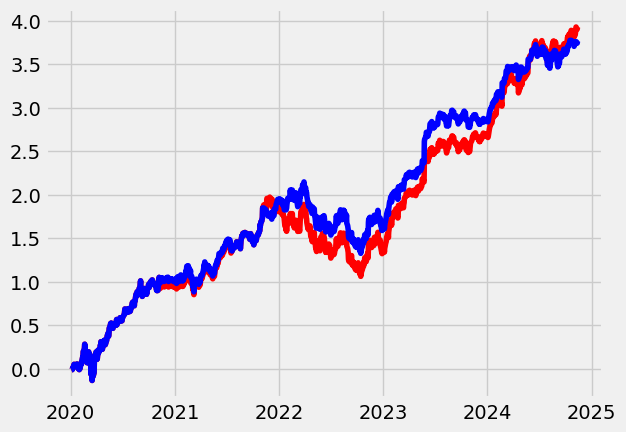

In [29]:
import matplotlib.pyplot as plt
 
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')
